In [17]:
import pandas as pd
path = "AT-33-F_SX(TCombo)_6.125_DLog_Envi.las"
path

'AT-33-F_SX(TCombo)_6.125_DLog_Envi.las'

In [40]:
import re
with open(path, encoding="ISO-8859-1") as f:
    header_section = False
    data_section = False
    headers = []
    data = []
    for line in f:
        if header_section and ('~' in line):
            header_section = False

        if '~curve information' in line.lower():
            header_section = True

        if '~A' in line:
            data_section = True

        if header_section and ('#' != line[0]) and ('~' != line[0]):
            headers.append(line.split()[0].split('.')[0].strip())
            
        if data_section and ('#' != line[0]) and ('~' != line[0]):
            data.append(re.split('\s+', line.strip()))

df = pd.DataFrame(data, columns=headers)
df = df.apply(pd.to_numeric)



In [37]:
df

,DEPT,BS,TENS,HTEN,AT10,AT20,AT30,AT60,AT90,DRHOLS,PEF,RHOB,CALI,TNRA,CFTC,CNTC,NPOR,GR
0,1518.3612,8.500,-999.25000,-999.25000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,1518.5136,8.500,-999.25000,-999.25000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,1518.6660,8.500,-999.25000,-999.25000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,1518.8184,8.500,-999.25000,-999.25000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,1518.9708,8.500,-999.25000,-999.25000,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11310,3242.0052,6.125,2611.74937,702.32202,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
11311,3242.1576,6.125,2565.37578,626.42765,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
11312,3242.3100,6.125,2520.33306,554.41392,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
11313,3242.4624,6.125,2457.49896,475.03276,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11315 entries, 0 to 11314
Data columns (total 18 columns):
DEPT      11315 non-null float64
BS        11315 non-null float64
TENS      11315 non-null float64
HTEN      11315 non-null float64
AT10      11315 non-null float64
AT20      11315 non-null float64
AT30      11315 non-null float64
AT60      11315 non-null float64
AT90      11315 non-null float64
DRHOLS    11315 non-null float64
PEF       11315 non-null float64
RHOB      11315 non-null float64
CALI      11315 non-null float64
TNRA      11315 non-null float64
CFTC      11315 non-null float64
CNTC      11315 non-null float64
NPOR      11315 non-null float64
GR        11315 non-null float64
dtypes: float64(18)
memory usage: 1.6 MB


In [20]:
def z(df) :
    return(df - df.mean())/df.std()

In [36]:
df.describe()

,DEPT,BS,TENS,HTEN,AT10,AT20,AT30,AT60,AT90,DRHOLS,PEF,RHOB,CALI,TNRA,CFTC,CNTC,NPOR,GR
count,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000,11315.000000
mean,2380.488000,6.233517,2174.486279,1075.716153,-11.141109,24.342714,40.262104,-11.523683,-4.602542,-17.725463,-13.917578,-15.209740,-11.448096,-14.348531,1651.162416,5717.769874,-17.463406,113.045015
std,497.815131,0.495958,520.342176,281.974296,132.415387,292.356892,341.810732,132.326686,160.467626,131.668233,142.619951,132.005722,132.172612,132.794195,959.112829,1842.696395,131.703288,152.864115
min,1518.361200,6.125000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,1949.424600,6.125000,1947.416685,1080.119300,2.774600,2.736965,2.682130,2.619555,2.622610,-0.057395,4.986775,2.423580,6.214480,2.946285,1093.598000,4779.161500,0.154700,107.415050
50%,2380.488000,6.125000,2198.500180,1103.774590,4.009010,3.977230,3.953760,3.895300,3.891930,-0.037940,5.908740,2.548910,6.220810,3.574580,1406.038000,5482.931000,0.200960,136.652500
75%,2811.551400,6.125000,2494.375500,1146.705680,6.723955,7.000205,7.075765,6.866260,6.910335,-0.014990,6.894685,2.622935,6.235300,4.015510,2098.506000,6761.546500,0.238110,156.766050
max,3242.614800,8.500000,2966.333770,1297.897340,88.602490,1950.000000,1950.000000,168.406300,1950.000000,0.276890,25.000000,2.940550,9.253660,7.967550,6772.632000,12546.510000,1.022750,343.965700


In [21]:
dz= z(df[:])

In [22]:
dz

,DEPT,BS,TENS,HTEN,AT10,AT20,AT30,AT60,AT90,DRHOLS,PEF,RHOB,CALI,TNRA,CFTC,CNTC,NPOR,GR
0,-1.731821,4.569905,-6.099325,-7.358707,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
1,-1.731515,4.569905,-6.099325,-7.358707,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
2,-1.731209,4.569905,-6.099325,-7.358707,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
3,-1.730903,4.569905,-6.099325,-7.358707,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
4,-1.730597,4.569905,-6.099325,-7.358707,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11310,1.730597,-0.218804,0.840338,-1.324213,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
11311,1.730903,-0.218804,0.751216,-1.593367,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
11312,1.731209,-0.218804,0.664653,-1.848758,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364
11313,1.731515,-0.218804,0.543897,-2.130277,-7.462191,-3.501175,-3.041192,-7.464302,-6.198431,-7.454528,-6.908798,-7.454527,-7.473575,-7.416751,-2.7634,-3.645212,-7.454534,-7.276364


In [23]:
import seaborn as sns


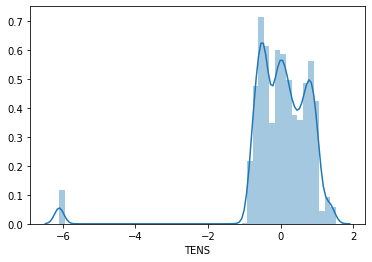

In [24]:
x = (dz['TENS'])
sns.distplot(x)

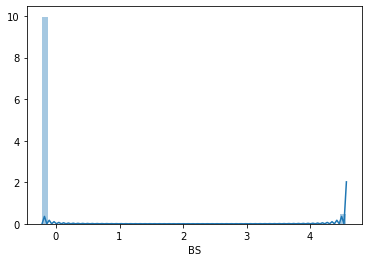

In [25]:
x = (dz['BS'])
sns.distplot(x);

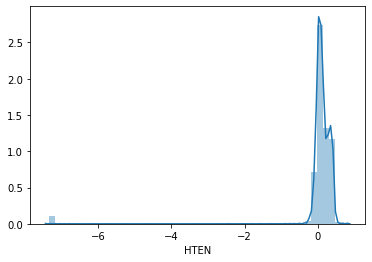

In [26]:
x = (dz['HTEN'])
sns.distplot(x);

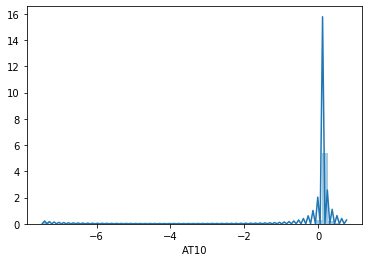

In [27]:
x = (dz['AT10'])
sns.distplot(x);

In [34]:
df.groupby('HTEN')


DEPT                                                           \
             count       mean          std        min        25%        50%   
HTEN                                                                          
-999.25000   200.0  1533.5250     8.820788  1518.3612  1525.9431  1533.5250   
 386.79300     1.0  3242.6148          NaN  3242.6148  3242.6148  3242.6148   
 475.03276     1.0  3242.4624          NaN  3242.4624  3242.4624  3242.4624   
 554.41392     1.0  3242.3100          NaN  3242.3100  3242.3100  3242.3100   
 626.42765     1.0  3242.1576          NaN  3242.1576  3242.1576  3242.1576   
...            ...        ...          ...        ...        ...        ...   
 1215.84252    1.0  2996.7936          NaN  2996.7936  2996.7936  2996.7936   
 1218.50359    2.0  2273.4270  1022.779330  1550.2128  1911.8199  2273.4270   
 1225.15681    1.0  2996.4888          NaN  2996.4888  2996.4888  2996.4888   
 1297.27619    1.0  1548.8412          NaN  1548.8412  1548.8412  1548.8412   
 1297.89734    1.0  1548.9936          NaN  1548.9936  1548.9936  1548.9936   

                                      BS          ...        NPOR             \
                   75%        max  count    mean  ...         75%        max   
HTEN                                              ...                          
-999.25000   1541.1069  1548.6888  200.0  8.5000  ...    0.282602    0.49031   
 386.79300   3242.6148  3242.6148    1.0  6.1250  ... -999.250000 -999.25000   
 475.03276   3242.4624  3242.4624    1.0  6.1250  ... -999.250000 -999.25000   
 554.41392   3242.3100  3242.3100    1.0  6.1250  ... -999.250000 -999.25000   
 626.42765   3242.1576  3242.1576    1.0  6.1250  ... -999.250000 -999.25000   
...                ...        ...    ...     ...  ...         ...        ...   
 1215.84252  2996.7936  2996.7936    1.0  6.1250  ...    0.175160    0.17516   
 1218.50359  2635.0341  2996.6412    2.0  7.3125  ...    0.201023    0.21888   
 1225.15681  2996.4888  2996.4888    1.0  6.1250  ...    0.101180    0.10118   
 1297.27619  1548.8412  1548.8412    1.0  8.5000  ...    0.244970    0.24497   
 1297.89734  1548.9936  1548.9936    1.0  8.5000  ...    0.263640    0.26364   

                GR                                                             \
             count        mean         std        min         25%         50%   
HTEN                                                                            
-999.25000   200.0 -106.959387  398.047210 -999.25000   48.270983   60.337605   
 386.79300     1.0 -999.250000         NaN -999.25000 -999.250000 -999.250000   
 475.03276     1.0 -999.250000         NaN -999.25000 -999.250000 -999.250000   
 554.41392     1.0 -999.250000         NaN -999.25000 -999.250000 -999.250000   
 626.42765     1.0 -999.250000         NaN -999.25000 -999.250000 -999.250000   
...            ...         ...         ...        ...         ...         ...   
 1215.84252    1.0  165.468800         NaN  165.46880  165.468800  165.468800   
 1218.50359    2.0  120.269420   63.195802   75.58324   97.926330  120.269420   
 1225.15681    1.0  167.429000         NaN  167.42900  167.429000  167.429000   
 1297.27619    1.0   82.241840         NaN   82.24184   82.241840   82.241840   
 1297.89734    1.0   83.618330         NaN   83.61833   83.618330   83.618330   

                                    
                    75%        max  
HTEN                                
-999.25000    77.586855  151.59760  
 386.79300  -999.250000 -999.25000  
 475.03276  -999.250000 -999.25000  
 554.41392  -999.250000 -999.25000  
 626.42765  -999.250000 -999.25000  
...                 ...        ...  
 1215.84252  165.468800  165.46880  
 1218.50359  142.612510  164.95560  
 1225.15681  167.429000  167.42900  
 1297.27619   82.241840   82.24184  
 1297.89734   83.618330   83.61833  

[2091 rows x 136 columns]